# TP1 SI221 - Perceptron

## Question 1 - Synthetic data

### 1.1 - Exécuter l'algorithme 50 fois avec $\sigma = \{0.05,0.25,0.50,0.75\}$

#### Code pour générer les données et ajouter le bias à la fin de chaque vecteur de données

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random, math
import tiilab
from sklearn.datasets import make_blobs

def generate_data(sigma):
	X,y = make_blobs(n_samples=200, centers=[[-1,0],[1,0]], n_features=2, cluster_std=sigma)
	return add_bias(X),y

def add_bias(X):
	newX = []
	for x in X:
		newX.append((x[0],x[1],1))
	X=np.array(newX)
	return X

sigma = 0.05
X,y = generate_data(sigma)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.show()


#### Code pour afficher les données et l'hyperplan grâce au poids $w$

In [2]:
def affichage(X,y,w):
    plt.scatter(X[:,0],X[:,1],c=y)
    abs = np.arange(-1,1,0.01)
    f = -(w[0]/w[1]) * abs - (w[2]/w[1])
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    plt.plot(abs,f)
    plt.show()

#### Code pour prédire le résultat attendu et pour calculer les poids en cas de fausse prédiction

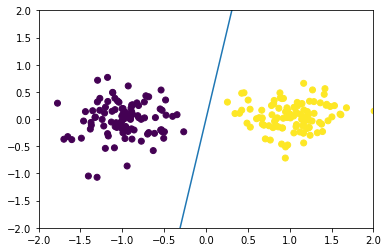

In [3]:
def predict(x, w):
	if(np.dot(w,x) > 0):
		return 1
	else:
		return 0
    
def train(data, y,eta, T,w):
	for i in range(T):
		for i in range(len(data)):
			prediction = predict(data[i], w)
			if(prediction != y[i]):
				if(prediction):
					w = w - eta * data[i]
				else:
					w = w + eta * data[i]
	return w

T=200
sigma = 0.3
eta=1
w=np.zeros(3)
X,y = generate_data(sigma)
w = train(X,y,eta,T,w)
affichage(X,y,w)

#### Code pour calculer le nombres d'erreurs obtenus avec le vecteur w

In [4]:
def calcul_erreur(data,y,w):
	err = 0
	for i in range(len(data)):
		if(predict(data[i],w)!=y[i]):
			err += 1
	return err

#avec les poids calculés précédemment
print(calcul_erreur(X,y,w))

#avec des poids aléatoires
w = np.random.rand(3)
print(calcul_erreur(X,y,w))

0
75


#### Code pour effectuer N fois l'algorithme du perceptron avec différentes valeur de $\sigma$, et qui calcule le nombre d'erreur et la déviation pour chaque $\sigma$

In [22]:
def do_N_perceptron(N,eta,T,sigmas):
    erreurs = np.zeros((4,T))
    e=np.zeros(4)
    s = np.zeros(4)
    for sigma in range(len(sigmas)):
        w = np.zeros(3)
        for n in range(N):
            X,y = generate_data(sigmas[sigma])
            #X = add_bias(X_no_bias)
            w = train(X,y,eta,T,w)
            erreurs[sigma][n] = calcul_erreur(X,y,w)
        e[sigma] = np.array(erreurs[sigma]).mean()
        s[sigma] = calcul_deviation(erreurs[sigma],e[sigma],N)
    return w, e,s

def calcul_deviation(erreurs,e,N):
	sum=0
	for i in range(N):
		sum += (erreurs[i]-e)**2
	s = np.sqrt(sum/50)
	return s

T = 200
sigmas = [0.05,0.25,0.5,0.75]
w, err, s = do_N_perceptron(50,0.01,T,sigmas)
print(w)
print("nombre d'erreurs : ",err)
print("deviation : ",s)

e =  0.0
e =  0.0
e =  1.89
e =  6.44
[ 0.02222397 -0.00525229  0.01      ]
nombre d'erreurs :  [0.   0.   1.89 6.44]
deviation :  [ 0.          0.          8.14833112 21.56767952]


#### Code pour afficher le nombre d'erreur et la déviation sur un graphique en bar

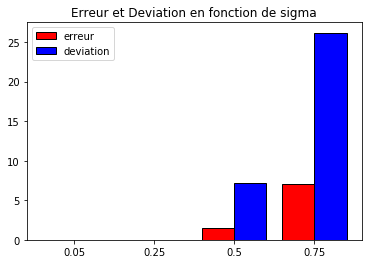

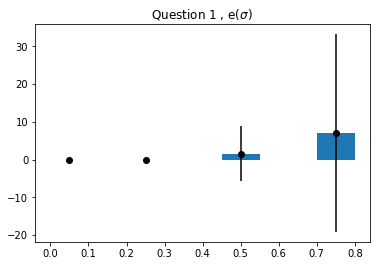

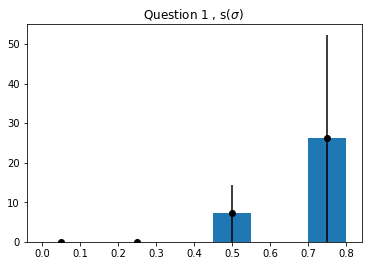

In [6]:
def affichage_bar(err,s):
    r = range(len(err))
    plt.title("Erreur et Deviation en fonction de sigma")
    plt.bar(r, err, width = 0.4, color = 'red',
           edgecolor = 'black', linewidth = 1, label='erreur')
    plt.bar([x + 0.4 for x in r], s, width = 0.4, color = 'blue',
           edgecolor = 'black', linewidth = 1, label='deviation')
    plt.legend()
    plt.xticks([r1 + 0.4 / 2 for r1 in r], ['0.05', '0.25', '0.5', '0.75'])
    plt.show()
    
affichage_bar(err,s)

# Plot the results
plt.bar(sigmas,err, width=0.1, align="center")
plt.errorbar(sigmas,err,yerr=s, color='black', fmt='o')
plt.title("Question 1 , e($\sigma$) ")
plt.savefig("q1.png")
plt.show(block=False)

plt.bar(sigmas,s, width=0.1, align="center")
plt.errorbar(sigmas,s,yerr=s, color='black', fmt='o')
plt.title("Question 1 , s($\sigma$) ")
plt.savefig("q1.png")
plt.show(block=False)


### 1.2 - Exécuter l'algorithme 50 fois avec $p=\{0,0.05,0.10,0.20\}$. On change le label du set de données avec une probabilité de $p$

#### Code pour effectuer N fois l'algorithme du perceptron avec différentes valeur de $p$ , et qui calcule le nombre d'erreur et la déviation pour chaque  p

[0.13938774 0.05640616 0.        ]
taux d'erreurs et deviation :  [ 0.   18.14 28.12 66.42]
deviation :  [ 0.         22.77279956 22.65713133 34.43840298]


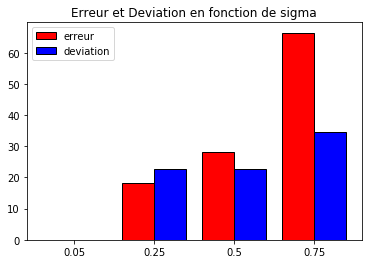

In [7]:
def do_N_perceptron_with_p(N,eta,T,p):
	erreurs = np.zeros((4,N))
	e=np.zeros(4)
	s = np.zeros(4)
	for k in range(len(p)):
		w = np.zeros(3)
		for n in range(N):
			X,y = generate_data(0.15)
			for i in range(len(X)):
				rd = random.random()
				if(rd<p[k]):
					y[i] = 1 - y[i]
			w = train(X,y,eta,T,w)
			erreurs[k][n] = calcul_erreur(X,y,w)
		e[k] = np.array(erreurs[k]).mean()
		s[k] = calcul_deviation(erreurs[k],e[k],N)
	return w, e,s

T = 200
N=50
p = [0,0.05,0.10,0.20]
w, err, s = do_N_perceptron_with_p(N,0.1,T,p)

print(w)
print("taux d'erreurs et deviation : ",err)
print("deviation : ",s)

affichage_bar(err,s)

## Question 2 - Image data: LANDSAT on Tarascon
### 2.1 - label 1 si $pixel < 30$, sinon label 2
#### Code pour charger et afficher une image

imz2mat : version janvier 2018.  Fichier à ouvrir : data/landsattarasconC4.ima
Dans ximaread : image monocanal
Dans ximaread : lecture du canal 0/1
image en .ima
image en .ima
image en .ima  512   512   canaux: 1  verif :  0
lecture de  data/landsattarasconC4.ima  en quelconque 512 512 1  offset  0 >B 1  complex 0 blocksize 262144
Données réelles. Nouvelle version de imz2mat  >B
Affichage d'une image reelle
Image seuillee : valmoy (86.344) + 3.000 sigma  (0.,152.41)
plt.show dans visusar : image 512 x 512


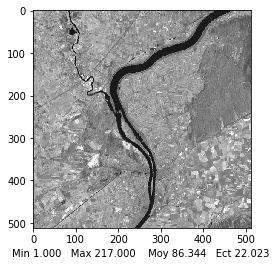

array([[ 74.,  82., 107., ...,  79.,  74.,  94.],
       [ 96., 111., 116., ...,  84.,  77.,  99.],
       [ 81., 109., 117., ...,  90.,  86.,  91.],
       ...,
       [ 78.,  82.,  80., ...,  61.,  69.,  65.],
       [ 81.,  76.,  78., ...,  57.,  58.,  65.],
       [ 83.,  81.,  84., ...,  57.,  54.,  65.]])

In [8]:
img=tiilab.imz2mat("data/landsattarasconC4.ima")
tiilab.visusar(img[0])

#### Code pour générer la matrice de label et l'afficher

Nombre de pixels de valeur < 30 =  11095


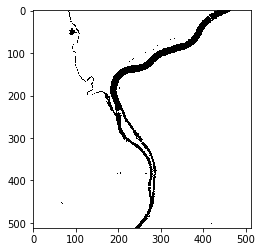

In [9]:
def evaluate_pixels1(image):
	nb_rows = len(image[0])
	nb_cols = len(image[0][0])
	labels=np.zeros((nb_rows,nb_cols))
	for row in range(nb_rows):
		for col in range(nb_cols):
			if(image[0][row][col] < 30):
				labels[row][col] = 1
			else:
				labels[row][col] = 2
	return labels

lab = evaluate_pixels1(img)
print("Nombre de pixels de valeur < 30 = ",np.sum(lab==1))
plt.imshow(lab)
plt.show()

#### Code pour prédire et calculer le nombre de mauvaises prédictions

In [10]:
def predict_im(x, w):
	if(np.dot(w,x) > 0):
		return 1
	else:
		return 2

def calcul_error_im(image,labels,w):
	error=0
	for row in range(len(image)):
		for col in range(len(image[1])):
			prediction = predict_im((image[row][col],1),w)
			if(prediction != labels[row][col]):
				error += 1
	return error

w = np.random.rand(2)
print(w)
err = calcul_error_im(img[0],lab,w)
print(err)

[0.52819241 0.88745477]
251049


#### Code pour calculer les poids 

In [11]:
def train_image(image,labels,eta,w):
	nb_rows = len(image[0])
	nb_cols = len(image[1])
	for row in range(nb_rows):
		for col in range(nb_cols):
			prediction = predict_im((image[row][col],1),w)
			if(prediction != labels[row][col]):
				if(prediction==1):
					w = w - eta * np.array([image[row][col],1])
				else:
					w = w + eta * np.array([image[row][col],1])
	return w

eta=0.01
w = train_image(img[0],lab,eta,w)
err = calcul_error_im(img[0],lab,w)
print(w)
print(err)

[-0.08180759  2.39745477]
0


#### Code de la fonction `error_correction`

In [12]:
def error_correction(image, labels, eta, weights, max_epoch):
    erreur=-1
    epoch=0
    while(erreur!=0):
        erreurs = []
        weights = train_image(image,labels,eta,weights)
        erreurs.append(calcul_error_im(image,labels,weights))
        erreur = np.sum(erreurs)
        epoch += 1
        print("epoch : ",epoch)
        print("weight :",weights)
        print("erreur : ",erreur)
        if(epoch==max_epoch):
            return weights,erreur,epoch
    return weights,erreur,epoch

w,err,epoch = error_correction(img[0],lab,eta,w,-1)

print("final weights after "+str(epoch)+" executions : ",w)
print("final error "+str(epoch)+" executions : ",err)
if(err==0):
    print("Perceptron Algorithm converged after "+str(epoch)+" iterations")
else:
    print("Perceptron Algorithm didn't converge after "+str(epoch)+" iterations")


epoch :  1
weight : [-0.08180759  2.39745477]
erreur :  0
final weights after 1 executions :  [-0.08180759  2.39745477]
final error 1 executions :  0
Perceptron Algorithm converged after 1 iterations


### 2.2 - label 1 si $pixel = 110$, sinon label 2
#### Code pour générer la matrice de label et l'afficher

Nombre de pixels de valeur = 110 =  2391


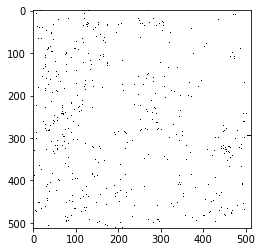

In [13]:
def evaluate_pixels2(image):
	nb_rows = len(image[0])
	nb_cols = len(image[0][0])
	labels=np.zeros((nb_rows,nb_cols))
	for row in range(nb_rows):
		for col in range(nb_cols):
			if(image[0][row][col] == 110):
				labels[row][col] = 1
			else:
				labels[row][col] = 2
	return labels

lab = evaluate_pixels2(img)
print("Nombre de pixels de valeur = 110 = ",np.sum(lab==1))
plt.imshow(lab)
plt.show()

#### Execution du perceptron 20 fois

In [14]:
epoch = 0
error = -1
w = np.random.rand(2)
w,error,epoch = error_correction(img[0],lab,eta,w,20)
    
print("final weights after "+str(epoch)+" executions : ",w)
print("final error "+str(epoch)+" executions : ",error)

if(error==0):
    print("Perceptron Algorithm converged after "+str(epoch)+" iterations")
else:
    print("Perceptron Algorithm didn't converge after "+str(epoch)+" iterations")


epoch :  1
weight : [-0.60613113 -0.52509731]
erreur :  2391
epoch :  2
weight : [-0.62613113 -1.76509731]
erreur :  2391
epoch :  3
weight : [-0.61613113 -2.95509731]
erreur :  2391
epoch :  4
weight : [-0.60613113 -4.15509731]
erreur :  2391
epoch :  5
weight : [-0.61613113 -5.40509731]
erreur :  2391
epoch :  6
weight : [-0.56613113 -6.57509731]
erreur :  2391
epoch :  7
weight : [-0.62613113 -7.71509731]
erreur :  2391
epoch :  8
weight : [-0.53613113 -8.88509731]
erreur :  2391
epoch :  9
weight : [ -0.51613113 -10.04509731]
erreur :  2391
epoch :  10
weight : [ -0.55613113 -11.16509731]
erreur :  2391
epoch :  11
weight : [ -0.54613113 -12.24509731]
erreur :  2391
epoch :  12
weight : [ -0.22613113 -13.32509731]
erreur :  2391
epoch :  13
weight : [ -0.54613113 -14.40509731]
erreur :  2391
epoch :  14
weight : [ -0.49613113 -15.44509731]
erreur :  2391
epoch :  15
weight : [ -0.12613113 -16.50509731]
erreur :  2391
epoch :  16
weight : [  0.03386887 -17.50509731]
erreur :  2391
e

### 2.2 - label 1 si $pixel > 140$, sinon label 2
#### Code pour générer la matrice de label et l'afficher

Nombre de pixels de valeur > 140 =  1593


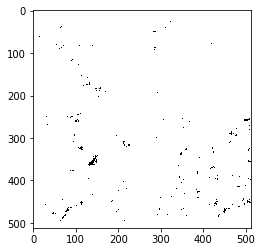

In [15]:
def evaluate_pixels3(image):
	nb_rows = len(image[0])
	nb_cols = len(image[0][0])
	labels=np.zeros((nb_rows,nb_cols))
	for row in range(nb_rows):
		for col in range(nb_cols):
			if(image[0][row][col] > 140):
				labels[row][col] = 1
			else:
				labels[row][col] = 2
	return labels

lab = evaluate_pixels3(img)
print("Nombre de pixels de valeur > 140 = ",np.sum(lab==1))
plt.imshow(lab)
plt.show()



#### Calcul du nombre d'epochs nécessaire avant que l'algorithme converge

In [16]:
w = np.random.rand(2)
w,err,epoch = error_correction(img[0],lab,eta,w,-1)

print("final weights after "+str(epoch)+" executions : ",w)
print("final error "+str(epoch)+" executions : ",err)

if(err==0):
    print("Perceptron Algorithm converged after "+str(epoch)+" iterations")
else:
    print("Perceptron Algorithm didn't converge after "+str(epoch)+" iterations")


epoch :  1
weight : [-0.3384915  -1.76356186]
erreur :  1593
epoch :  2
weight : [ 0.0215085  -3.02356186]
erreur :  0
final weights after 2 executions :  [ 0.0215085  -3.02356186]
final error 2 executions :  0
Perceptron Algorithm converged after 2 iterations
